0
[[99  1]
 [38 13]]
              precision    recall  f1-score   support

     class 1       0.72      0.99      0.84       100
     class 2       0.93      0.25      0.40        51

    accuracy                           0.74       151
   macro avg       0.83      0.62      0.62       151
weighted avg       0.79      0.74      0.69       151

0.7949019607843136
[0.1443367399075366, 0.14433667531317468, 0.14433661075748977, 0.1443365462404549, 0.1443364817620429]


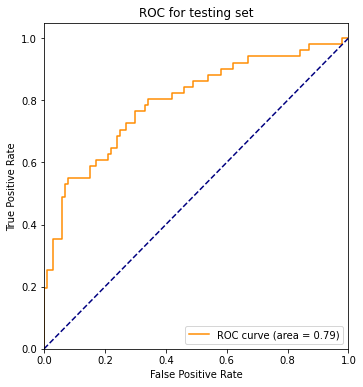

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve


class LogisticRegression():
    def __init__(self, train_address = '../data/pca_train.csv', test_address = '../data/pca_test.csv'):
        self.lam = None
        self.lr = None
        self.train_address = train_address
        self.test_address = test_address
        self.dataLoad()

    def dataLoad(self):
        self.origin_train = pd.read_csv(self.train_address)
        self.origin_test = pd.read_csv(self.test_address)

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def square_loss(self, y_pred, target):
        return np.mean(pow((y_pred - target),2))

    def classOneHot(self, label_arr):
        """
        Transform label array into matrix. The size is n*k, k is the number of classes
        This is one-hot transformation
        """
        n_class = np.unique(label_arr).size
        y_matrix = np.zeros((label_arr.shape[0],n_class))
        y_matrix[label_arr==0,0] = 1
        y_matrix[label_arr==1,1] = 1
        return y_matrix.T

    def leastSquare(self, lam = 0, lr = 0.03, iteration = 10000):
        self.lam = lam
        self.lr = lr
        y_tr = self.origin_train['class']
        X_tr = self.origin_train.drop(['class'], axis = 1)
        X_tr = X_tr.apply(lambda t:((t - np.mean(t)) / np.std(t)))
        self.y_te = self.origin_test['class']
        self.X_te = self.origin_test.drop(['class'], axis = 1)
        self.X_te = self.X_te.apply(lambda t:((t - np.mean(t)) / np.std(t)))
        self.lr = 0.003
        W = np.random.uniform(0,1,len(X_tr.T))
        b = 0.1
        z = np.dot(X_tr, W) + b
        y_pred = self.sigmoid(z)
        
        self.loss = []
        for i in range(iteration):   
            gradient_W = (np.dot((y_pred-y_tr).T, X_tr) + self.lam * W)/(X_tr.shape[0])
            gradient_b = np.mean(y_pred-y_tr)
            W = W - self.lr * gradient_W
            b = b - self.lr * gradient_b
            z = np.dot(X_tr, W) + b
            y_pred = self.sigmoid(z)
            self.loss.append(self.square_loss(y_pred, y_tr))
        test_z = np.dot(self.X_te, W) + b
        
        self.prediction = self.sigmoid(test_z)
        self.score = copy.copy(self.prediction)

        self.prediction[np.where(self.prediction<0.5)] = 0
        self.prediction[np.where(self.prediction>=0.5)] = 1
        
    def testResult(self):  
        target_names = ['class 1', 'class 2']
        result_report = classification_report(self.y_te, self.prediction, target_names=target_names)
        confu_matrix = confusion_matrix(self.y_te, self.prediction)
        auc_score = roc_auc_score(self.y_te, self.score)
        print(self.lam)
        print(confu_matrix)
        print(result_report)
        print(auc_score)
        print(self.loss[-5:])

        score = self.score
        test_y = self.origin_test['class']
        auc = roc_auc_score(test_y, score)
        fpr, tpr, _ = roc_curve(test_y, score)
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.plot(fpr, tpr, color='darkorange',
                label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for testing set')
        plt.legend(loc="lower right")

if __name__=="__main__":
    p = LogisticRegression()
    p.leastSquare(lam=0)
    p.testResult()
